<a href="https://colab.research.google.com/github/Michalinh0/genetic_algorithm_graph/blob/main/graph_genetic_trial_and_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

genetic_algorithm_graph  sample_data


In [2]:
!pip install pygad
import pygad
!git clone https://github.com/Michalinh0/genetic_algorithm_graph.git
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'genetic_algorithm_graph' already exists and is not an empty directory.


In [3]:
#with open('genetic_algorithm_graph/graph.txt') as file:
#    lines = file.readlines()
#with open('genetic_algorithm_graph/graph2.txt') as file:
#    lines = file.readlines()
#with open('genetic_algorithm_graph/graph3.txt') as file:
#    lines = file.readlines()
with open('genetic_algorithm_graph/big_graph.txt') as file:
    lines = file.readlines()
lines = [line.strip() for line in lines]
print(lines)

['31', '1 2 1 3 2 4 2 5 3 6 3 7 4 8 4 9 5 10 5 11 6 12 6 13 7 14 7 15 8 16 8 17 9 18 9 19 10 20 10 21 11 22 11 23 12 24 12 25 13 26 13 27 14 28 14 29 15 30 15 31']


In [56]:
lines[0] = '11'
lines[1] = '11 1 8 1 9 1 10 1 11 2 8 2 9 2 10 2 11 3 8 3 9 3 10 3 11 4 8 4 9 4 10 4 11 5 8 5 9 5 10 5 11 6 8 6 9 6 10 6 11 7 8 7 9 7 10 7 11'

In [57]:
vertices_count = int(lines[0])
lines[1] = lines[1].split(" ")
print(vertices_count)
print(lines)
edges = list()
edges_count = int(len(lines[1]) / 2)
for i in range(edges_count):
  edges.append((lines[1][2*i] , lines[1][2*i + 1]))
print(edges)

11
['11', ['11', '1', '8', '1', '9', '1', '10', '1', '11', '2', '8', '2', '9', '2', '10', '2', '11', '3', '8', '3', '9', '3', '10', '3', '11', '4', '8', '4', '9', '4', '10', '4', '11', '5', '8', '5', '9', '5', '10', '5', '11', '6', '8', '6', '9', '6', '10', '6', '11', '7', '8', '7', '9', '7', '10', '7', '11']]
[('11', '1'), ('8', '1'), ('9', '1'), ('10', '1'), ('11', '2'), ('8', '2'), ('9', '2'), ('10', '2'), ('11', '3'), ('8', '3'), ('9', '3'), ('10', '3'), ('11', '4'), ('8', '4'), ('9', '4'), ('10', '4'), ('11', '5'), ('8', '5'), ('9', '5'), ('10', '5'), ('11', '6'), ('8', '6'), ('9', '6'), ('10', '6'), ('11', '7'), ('8', '7'), ('9', '7'), ('10', '7')]


In [49]:
vertices_count = 20
edges = [(11, 7),  (5, 9),  (17, 3),  (7, 8),  (19, 18),  (20, 5),  (15, 4),  (5, 14),  (17, 19),  (17, 15),  (6, 5),  (11, 6),  (8, 14),  (11, 4),  (14, 7),  (11, 17),  (4, 20),  (10, 14),  (18, 3),  (2, 3),]
edges_count = len(edges)

In [7]:
def onsegment(a,b,c):
  return b[0] <= max (a[0] , c[0]) and b[0] >= min(a[0] , c[0]) and b[1] <= max(a[1] , c[1]) and b[1] >= min(a[1] , c[1])

In [8]:
def orientation(a,b,c):
  val = (float(b[1] - a[1]) * (c[0] - b[0])) - (float(b[0] - a[0]) * (c[1] - b[1]))

  #print(val)

  if (val < 0):
    return -1
  elif (val > 0):
    return 1
  else:
    return 0

In [9]:
def intersect(p1,q1,p2,q2):
  #print("segment 1 : ", p1 , q1 ,"segment 2 : ", p2 , q2)
  if(p1 == p2 or p1 == q2 or q1 == p2 or q1 == q2):
    return False
  #print("Check orientations")
  o1 = orientation(p1, q1, p2)
  o2 = orientation(p1, q1, q2)
  o3 = orientation(p2, q2, p1)
  o4 = orientation(p2, q2, q1)

  if(o1 != o2 and o3 != o4):
    return True
  if ((o1 == 0) and onsegment(p1, p2, q1)):
    return True
  if ((o2 == 0) and onsegment(p1, q2, q1)):
    return True
  if ((o3 == 0) and onsegment(p2, p1, q2)):
    return True
  if ((o4 == 0) and onsegment(p2, q1, q2)):
    return True
  return False

In [10]:
def fitness(solution, solution_idx):
  fitness = 0
  for i in range(vertices_count):
    for j in range(vertices_count):
      if i == j:
        continue
      if solution[2*i] == solution[2*j] and solution[2*i + 1] == solution[2*j + 1]:
        return -999999
  i = 0
  for edge in edges:
    for j in range (i,len(edges)):
      edge2 = edges[j]
      if edge == edge2:
        continue
      #print(edge , edge2)
      ver1 = int(edge[0]) - 1
      p1 = (solution[2*ver1] , solution[2*ver1 + 1])
      ver2 = int(edge[1]) - 1
      q1 = (solution[2*ver2] , solution[2*ver2 + 1])
      ver3 = int(edge2[0]) - 1
      p2 = (solution[2*ver3] , solution[2*ver3 + 1])
      ver4 = int(edge2[1]) - 1
      q2 = (solution[2*ver4] , solution[2*ver4 + 1])
      if(intersect(p1,q1,p2,q2)):
        #print("These intersect :",edge , edge2)
        fitness -= 1
    i += 1
  return fitness

In [58]:
fitness_function = fitness

num_generations = 1000
num_parents_mating = 10

sol_per_pop = 10
num_genes = 2*vertices_count

init_range_low = 0
init_range_high = 100

random_mutation_min_val= -20
random_mutation_max_val= 20

gene_type=int

parent_selection_type = "rws"
keep_elitism = 5

crossover_type = "two_points"

mutation_type = "random"
mutation_percent_genes=50

In [59]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_elitism=keep_elitism,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=gene_type,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       random_mutation_min_val=random_mutation_min_val,
                       random_mutation_max_val=random_mutation_max_val,
                       save_solutions=True,
                       stop_criteria="reach_0")

ga_instance.run()

[ 49  35  11  28 132  -7   0  81   6  51  80   6  67  15 151 202  77  85
 -75 -47   0   4] -18
('11', '1')  ('8', '1')  ('9', '1')  ('10', '1')  ('11', '2')  ('8', '2')  ('9', '2')  ('10', '2')  ('11', '3')  ('8', '3')  ('9', '3')  ('10', '3')  ('11', '4')  ('8', '4')  ('9', '4')  ('10', '4')  ('11', '5')  ('8', '5')  ('9', '5')  ('10', '5')  ('11', '6')  ('8', '6')  ('9', '6')  ('10', '6')  ('11', '7')  ('8', '7')  ('9', '7')  ('10', '7')  

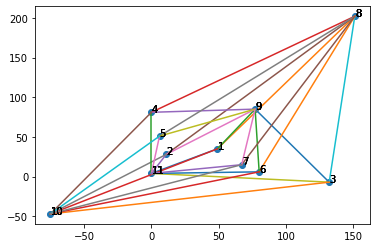

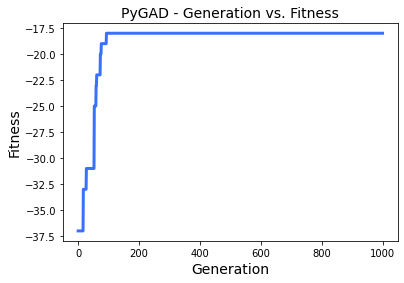

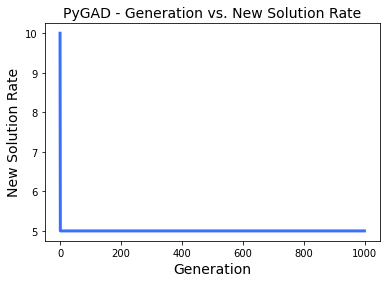

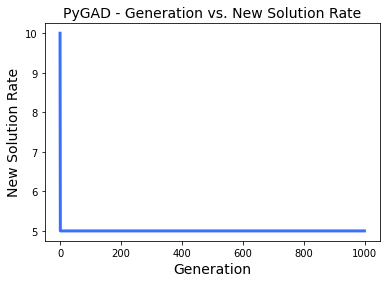

In [60]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
x = list()
y = list()

for i in range(vertices_count):
  x.append(solution[2*i])
  y.append(solution[2*i + 1])
  
print(solution , solution_fitness)
plt.scatter(x, y)

for edge in edges:
    print(edge, end='  ')

    x = [solution[2 * (int(edge[0]) - 1)], solution[2 * (int(edge[1]) - 1)]]
    y = [solution[2 * (int(edge[0]) - 1) + 1], solution[2 * (int(edge[1]) - 1) + 1]]

    plt.plot(x, y)

    plt.text(x[0] + 0.1, y[0] + 0.1, edge[0])
    plt.text(x[1] + 0.1, y[1] + 0.1, edge[1])

ga_instance.plot_fitness()
ga_instance.plot_new_solution_rate()